# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Целью нашего исследования будет понять взаимосвязь различных параметров (количество комнат, площадь, расположения и т.д.) с ценой квартиры, в какой период обьявления о продаже выставляются чаще, а также определить где квартира будет самой дорогой. 

Для достижения вышеуказанных целей мы проведем сначала предобработку данных: заполним пропуски (где это будет возможно), избавимся от неявных дубликатов и аномалий. 
После того как данные будут готовы необходимо будет постороить несколько графиков для понимания степени влияния параметров на цену и найдем корреляцию. Далее выполним несколько заданий, которые позволят нам изучить как быстро продавались квартиры, влияние различных факторов на общую (полную) стоимость объекта, посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, вычислим среднюю цену каждого километра и опишем, как стоимость объектов зависит от расстояния до центра города. 


### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv')

In [4]:
display(data)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
...,...
23694,9\t9700000.0\t133.81\t2017-03-21T00:00:00\t3\t...
23695,14\t3100000.0\t59.0\t2018-01-15T00:00:00\t3\t\...
23696,18\t2500000.0\t56.7\t2018-02-11T00:00:00\t2\t\...
23697,13\t11475000.0\t76.75\t2017-03-28T00:00:00\t2\...


In [5]:
display(data.head(10))

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

In [7]:
print(data.dtypes)

total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition    object
dtype: object


###### Данные склеины в одну строку, тип данных только в формате "object", для первоначальной изучения общей информации требуется привести сначала разделение по столбцам и изменить тип данных.

In [8]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [9]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [10]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [12]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [13]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

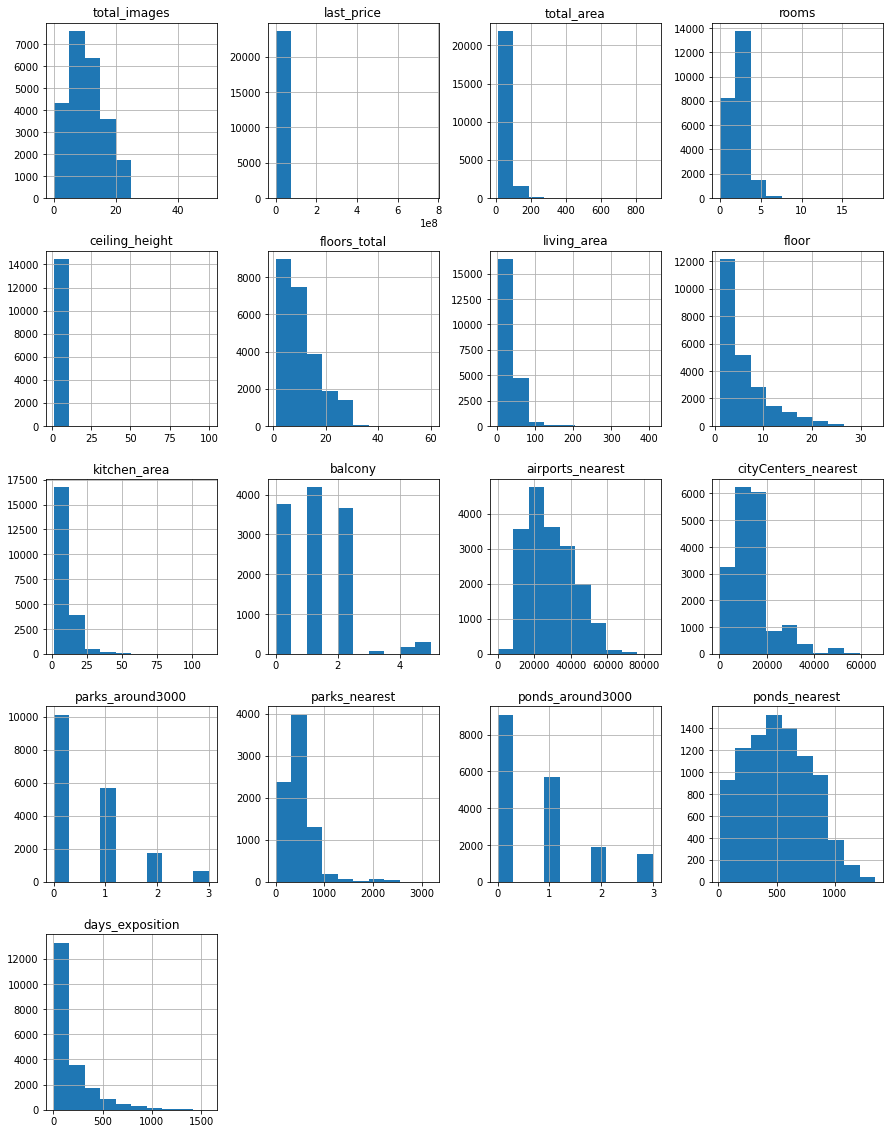

In [14]:
data.hist(figsize=(15, 20))

#### После преобразования данных в табличный и читаемый вид были обнаружены многочисленные пропуски. Есть столбец 'is_apartment' где пропусков больше всех, есть ряд столбцов (таких как 'ceiling_height', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest',	'ponds_around3000',	'ponds_nearest','days_exposition') где пропуски единичны (из-за одной строки) или больше. Столбцов 'studio' и 'open_plan' вообще не вижу в датафрейме.

#### Теперь по типу данных.

 0   total_images          int64  - оставляем как есть
 
 1   last_price            float64 - оставляем как есть
 
 2   total_area            float64 - оставляем как есть
 
 3   first_day_exposition  object - необходимо перевести в тип datetime
 
 4   rooms                 int64 - оставляем как есть
 
 5   ceiling_height        float64 - оставляем как есть
 
 6   floors_total          float64 - должен быть int
 
 7   living_area           float64 - оставляем как есть
 
 8   floor                 int64 - оставляем как есть
 
 9   is_apartment          object - должен быть bool, но очень много значений пропущено. Думаю можно удалить столбец полностью, он не передает никакую нужную информацию для исследования
 
 10  studio                bool - оставляем как есть   
 
 11  open_plan             bool - оставляем как есть  
 
 12  kitchen_area          float64 - оставляем как есть
 
 13  balcony               float64 - должен быть int
 
 14  locality_name         object - оставляем как есть
 
 15  airports_nearest      float64 - оставляем как есть
 
 16  cityCenters_nearest   float64 - оставляем как есть
 
 17  parks_around3000      float64 - можно заменить на int
 
 18  parks_nearest         float64 - оставляем как есть
 
 19  ponds_around3000      float64 - можно заменить на int
 
 20  ponds_nearest         float64 - оставляем как есть
 
 21  days_exposition       float64 - можно заменить на int

### Предобработка данных

In [15]:
# заменяю пропуски в столбце 'ceiling_height' средним арифмитическим (беру среднее потому что разброс не сильно большой и медиана от среднего почти не отличаеется, считаю, что не повлияет на исследование):
print(data['ceiling_height'].value_counts())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())


2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


In [16]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [17]:
(data['living_area'] > 40).value_counts()

False    17467
True      6232
Name: living_area, dtype: int64

In [18]:
# я предлагаю заплнить пустые значения медианной в столбце 'living_area'. Размер площади более 40 кв.м в данных 25%, 
# пропусков около 8%.
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [19]:
# перейдем к столбцу с самым большим количеством пропусков 'is_apartment'
# судя по всему произошла техническая ошибка и выгрузились почти все данные без статуса апартаменты это или нет.
data['is_apartment'].value_counts() # с учетом того, что большинство не апартаменты , это значение не влияет на исследование 
# я предлагаю заполнить пустые строки значением 'False'
data['is_apartment'] = data['is_apartment'].fillna('False')

In [20]:
# столбец 'balcony' пустые значения я заполню 0. т.к. вероятно там и правда они отсутствуют как было указано в примере 
# и изменю тип на int. 
# но я бы тоже так подумал :)
data['balcony'] = data['balcony'].fillna('0')
data['balcony'] = data['balcony'].astype('int')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(-100.0, 0, '2019-01-23T00:00:00'),
  Text(0.0, 0, '2014-11-27T00:00:00'),
  Text(100.0, 0, '2016-08-29T00:00:00'),
  Text(200.0, 0, '2017-08-11T00:00:00'),
  Text(300.0, 0, '2018-01-17T00:00:00'),
  Text(400.0, 0, '2018-06-15T00:00:00'),
  Text(500.0, 0, '2018-10-02T00:00:00'),
  Text(600.0, 0, '2019-01-14T00:00:00'),
  Text(700.0, 0, '2019-04-26T00:00:00'),
  Text(800.0, 0, '')])

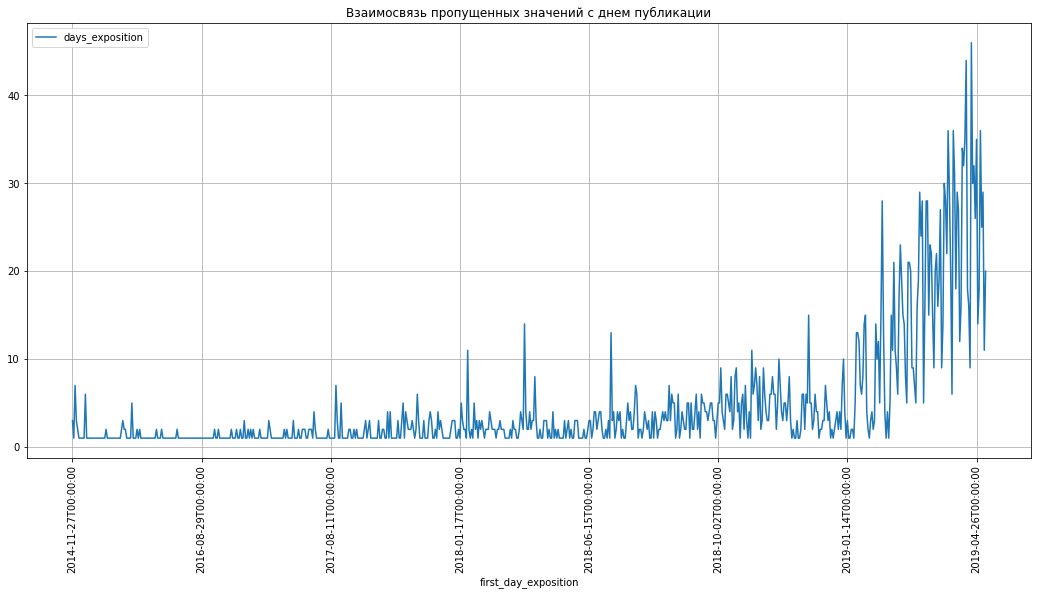

In [21]:
pivot_table_days_exposition = (
    data.query('days_exposition.isna()', engine='python')
    .fillna('a')
    .pivot_table(index='first_day_exposition', values='days_exposition', aggfunc = 'count')
    .plot(y='days_exposition', title='Взаимосвязь пропущенных значений с днем публикации', figsize=(18, 8), grid=True)
)
plt.xticks(rotation=90)

In [22]:
# столбцы 'days_exposition', 'parks_around3000', 'ponds_around3000' поменяю тип на 'int' и по аналогии с столбцом 'balcony' поставлю в пропусках 0, потому что
# cкорее всего кваритиры были проданы день в день
data['days_exposition'] = data['days_exposition'].fillna('0')
data['days_exposition'] = data['days_exposition'].astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [23]:
# cтолбец 'first_day_exposition' уберу время и поставлю только даты :
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')


In [24]:
# оставшиеся столбцы с пропусками : 'kitchen_area', 'airports_nearest', 'cityCenters_nearest','parks_nearest','ponds_nearest'
# заменю пропуски медианой. 
# все не указанные мной столбцы я оставляю без изменений.
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

In [25]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0
1,7,3350000.0,40.40,2018-12-04,1,2.771499,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,455.0,0,502.0,81
2,10,5196000.0,56.00,2015-08-20,2,2.771499,5.0,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,2.771499,14.0,30.00,9,False,...,9.10,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,2.771499,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,26726.0,13098.5,0,455.0,0,502.0,55
6,6,3700000.0,37.30,2017-11-02,1,2.771499,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,455.0,0,502.0,155
7,5,7915000.0,71.60,2019-04-18,2,2.771499,24.0,30.00,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,455.0,0,502.0,0
8,20,2900000.0,33.16,2018-05-23,1,2.771499,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,26726.0,13098.5,0,455.0,0,502.0,189
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,455.0,0,502.0,289


In [26]:
if (data['kitchen_area'].sum() + data['living_area'].sum()) < data['total_area'].sum():
    print('Все ок')
else:
    print('Хьюстон у нас проблемы')

Все ок


#### Приступаю к устранению неявных дубликатов

In [27]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [28]:
data['locality_name']=data['locality_name'].str.replace('ё','е')
data['locality_name']=data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name']=data['locality_name'].str.replace('коттеджный поселок','поселок')
data['locality_name']=data['locality_name'].str.replace('садовое товарищество','поселок')
data['locality_name']=data['locality_name'].str.replace('городской поселок','поселок')



In [29]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'
 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'поселок Новая Ропша' 'Павловск' 'деревня Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'деревня Куттузи'
 'поселок Аннино' 'поселок Ефимовский' 'поселок Плодовое'
 'деревня Заклинье' 'поселок Торковичи' 'поселок Первомайское'
 'Красное Село' 'поселок Понтонный' 'Сясьстрой' 'деревня Старая'
 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы' 'село Путилово'
 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино' 'Кудрово'
 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши' 'Луга'
 'Волосово' 'Отрадное' '

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

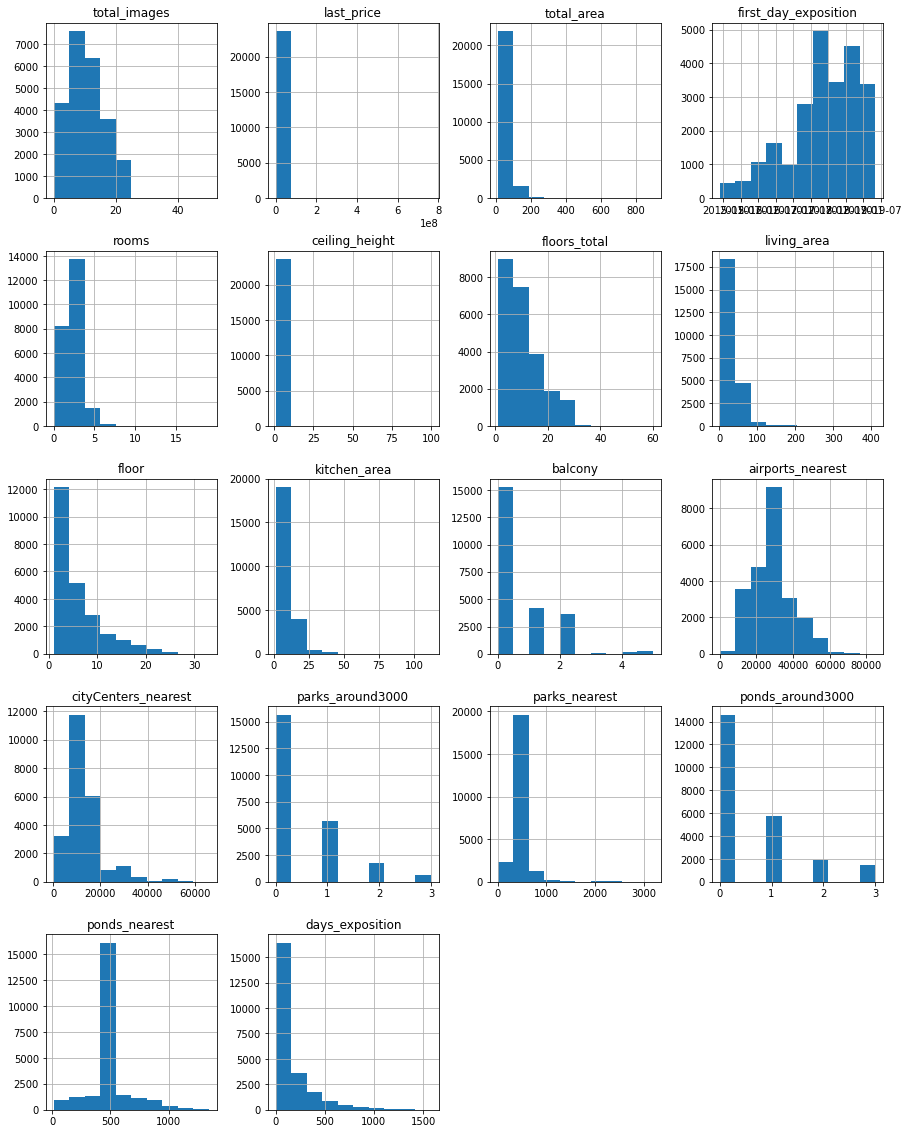

In [30]:
# работаю с аномалиями. 
data.hist(figsize=(15, 20))

Построив гистограммы я  ниже хочу построить график "ящик с усами" для точного определения "выбросов" .

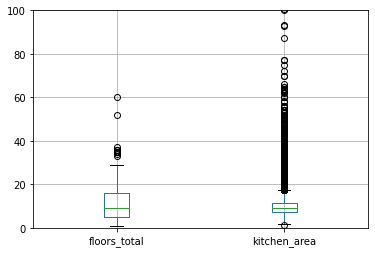

In [31]:
data.boxplot(column=['floors_total','kitchen_area'])
plt.ylim(0, 100)
plt.show()

Построив график "ящик с усами" по столбцам 'floors_total'и 'kitchen_area' можно отбросить значения в столбце 'floors_total' > 40 и в столбце 'kitchen_area' > 80. 

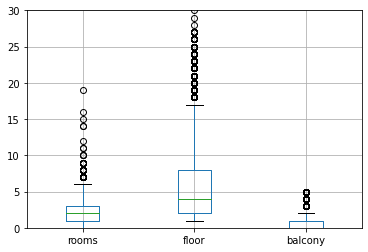

In [32]:
data.boxplot(column=['rooms','floor', 'balcony', ])
plt.ylim(0, 30)
plt.show()

Построив график "ящик с усами" по столбцам 'rooms', 'floor' и 'balcony' отбросить значения в столбце 'rooms' > 6 , в столбце 'floor' > 25 и 'balcony' > 4.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'total_images'),
  Text(2, 0, 'last_price'),
  Text(3, 0, 'total_area'),
  Text(4, 0, 'rooms'),
  Text(5, 0, 'ceiling_height'),
  Text(6, 0, 'floors_total'),
  Text(7, 0, 'living_area'),
  Text(8, 0, 'floor'),
  Text(9, 0, 'studio'),
  Text(10, 0, 'open_plan'),
  Text(11, 0, 'kitchen_area'),
  Text(12, 0, 'balcony'),
  Text(13, 0, 'airports_nearest'),
  Text(14, 0, 'cityCenters_nearest'),
  Text(15, 0, 'parks_around3000'),
  Text(16, 0, 'parks_nearest'),
  Text(17, 0, 'ponds_around3000'),
  Text(18, 0, 'ponds_nearest'),
  Text(19, 0, 'days_exposition')])

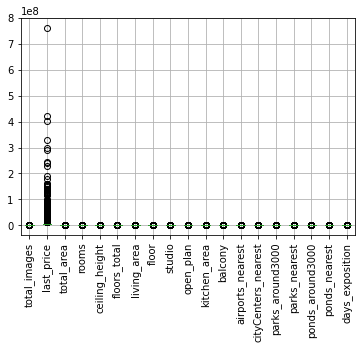

In [33]:
data.boxplot()
plt.xticks(rotation=90)

In [34]:
#data.describe()

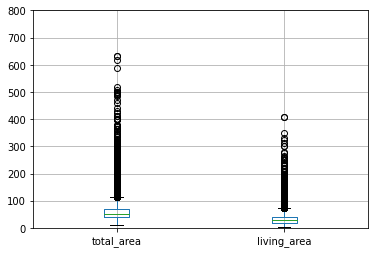

In [35]:
data.boxplot(column=['total_area', 'living_area'])
plt.ylim(0, 800)
plt.show()

Построив график "ящик с усами" по столбцам 'total_area'и 'living_area' можно отбросить значения в столбце 'total_area' > 500 и в столбце 'kitchen_area' > 300.

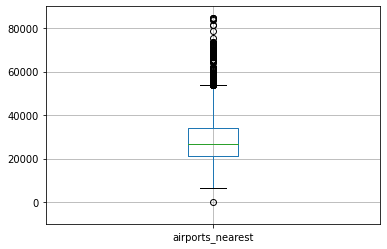

In [36]:
data.boxplot(column=['airports_nearest'])
plt.ylim(-10000, 90000)
plt.show()

Построив график "ящик с усами" по столбцу 'airports_nearest' можно отбросить значения > 8500 и меньше 5000.

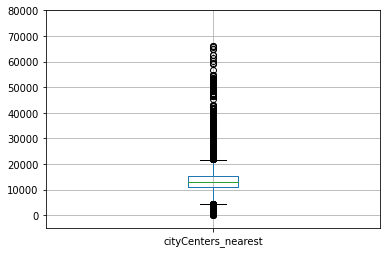

In [37]:
data.boxplot(column=['cityCenters_nearest'])
plt.ylim(-5000, 80000)
plt.show()

Построив график "ящик с усами" по столбцу 'cityCenters_nearest' можно отбросить значения > 50000.

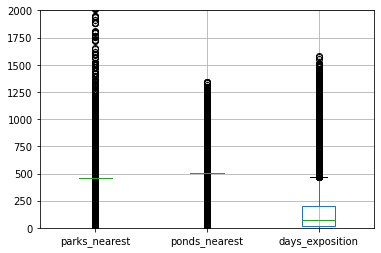

In [38]:
data.boxplot(column=['parks_nearest', 'ponds_nearest', 'days_exposition'])
plt.ylim(0, 2000)
plt.show()

Построив график "ящик с усами" по столбцам 'parks_nearest', 'ponds_nearest', 'days_exposition' можно отбросить значения в столбце 'parks_nearest' < 1000 и 'days_exposition' >  1000.

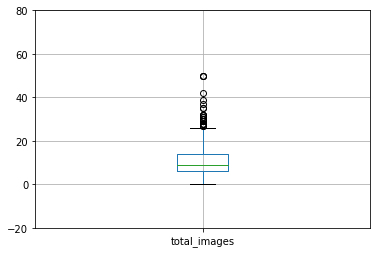

In [39]:
data.boxplot(column=['total_images', ])
plt.ylim(-20, 80)
plt.show()

В столбце 'total_images' выявлены выбросы, но я не думаю что они как то влияют на исследование. 

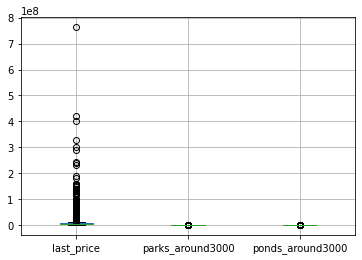

In [40]:
data.boxplot(column=['last_price', 'parks_around3000', 'ponds_around3000'])

plt.show()

В вышеуказанных столбцах , только в 'last_price' есть выбросы. Но с этим столбцом мы поработаем ниже. 

(-2.0, 4.0)

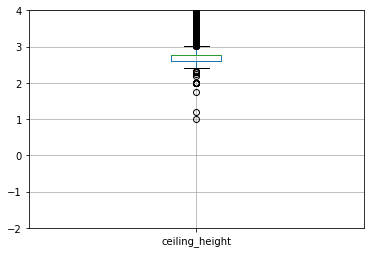

In [41]:
data.boxplot(column=['ceiling_height'])
plt.ylim(-2, 4)


В столбце с потолками есть выбросы (очень низкие потолки). Их я уберу ниже в коде. 

In [42]:
# применяю срез по столбцам исходя из данных гистограммы и частично из метода boxplot. Очищаю данные от "выбросов".
data_filter = data.query('total_area < 500 and rooms <= 6 and floors_total < 40 and living_area <= 300 and floor < 25 and kitchen_area < 80 and balcony <= 4')
data_filter = data_filter.query('5000 <= airports_nearest <= 85000 and cityCenters_nearest < 50000 and parks_nearest < 1000 and days_exposition < 1000 and 2 <= ceiling_height <= 3 and days_exposition != 0')

In [43]:
data_filter.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11.0,18.6,1,False,...,11.0,2,поселок Шушары,12817.0,18603.0,0,455.0,0,502.0,81
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,30.0,9,False,...,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
5,10,2890000.0,30.4,2018-09-10,1,2.771499,12.0,14.4,5,False,...,9.1,0,поселок Янино-1,26726.0,13098.5,0,455.0,0,502.0,55
6,6,3700000.0,37.3,2017-11-02,1,2.771499,26.0,10.6,6,False,...,14.4,1,поселок Парголово,52996.0,19143.0,0,455.0,0,502.0,155
9,18,5400000.0,61.0,2017-02-26,3,2.500000,9.0,43.6,7,False,...,6.5,2,Санкт-Петербург,50898.0,15008.0,0,455.0,0,502.0,289
10,5,5050000.0,39.6,2017-11-16,1,2.670000,12.0,20.3,3,False,...,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137
12,10,3890000.0,54.0,2016-06-30,2,2.771499,5.0,30.0,5,False,...,9.0,0,Сертолово,26726.0,13098.5,0,455.0,0,502.0,90
13,20,3550000.0,42.8,2017-07-01,2,2.560000,5.0,27.0,5,False,...,5.2,1,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366
14,1,4400000.0,36.0,2016-06-23,1,2.771499,6.0,17.0,1,False,...,8.0,0,Пушкин,20782.0,30759.0,0,455.0,1,96.0,203


In [44]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18244 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18244 non-null  int64         
 1   last_price            18244 non-null  float64       
 2   total_area            18244 non-null  float64       
 3   first_day_exposition  18244 non-null  datetime64[ns]
 4   rooms                 18244 non-null  int64         
 5   ceiling_height        18244 non-null  float64       
 6   floors_total          18244 non-null  float64       
 7   living_area           18244 non-null  float64       
 8   floor                 18244 non-null  int64         
 9   is_apartment          18244 non-null  object        
 10  studio                18244 non-null  bool          
 11  open_plan             18244 non-null  bool          
 12  kitchen_area          18244 non-null  float64       
 13  balcony         

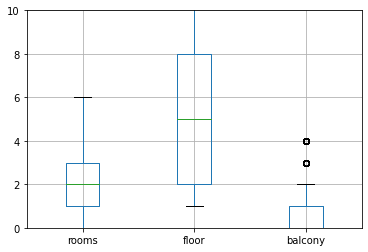

In [45]:
data_filter.boxplot(column=['rooms','floor', 'balcony'])
plt.ylim(0, 10)
plt.show()

<AxesSubplot:>

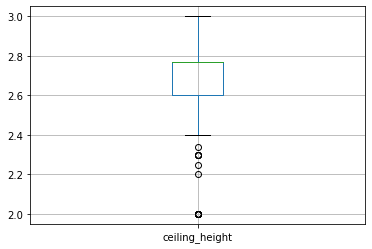

In [46]:
data_filter.boxplot(column=['ceiling_height'])

In [47]:
data_filter['total_images'] = data_filter['total_images'].astype('int32')
data_filter['last_price'] = data_filter['last_price'].astype('float32')
data_filter['total_area'] = data_filter['total_area'].astype('float32')
data_filter['rooms'] = data_filter['rooms'].astype('int32')
data_filter['ceiling_height'] = data_filter['ceiling_height'].astype('float32')
data_filter['floors_total'] = data_filter['floors_total'].astype('float32')
data_filter['living_area'] = data_filter['living_area'].astype('float32')
data_filter['floor'] = data_filter['floor'].astype('int32')
data_filter['kitchen_area'] = data_filter['kitchen_area'].astype('float32')
data_filter['balcony'] = data_filter['balcony'].astype('int32')
data_filter['airports_nearest'] = data_filter['airports_nearest'].astype('float32')
data_filter['cityCenters_nearest'] = data_filter['cityCenters_nearest'].astype('float32')
data_filter['parks_around3000'] = data_filter['parks_around3000'].astype('int32')
data_filter['parks_nearest'] = data_filter['parks_nearest'].astype('float32')
data_filter['ponds_around3000'] = data_filter['ponds_around3000'].astype('int32')
data_filter['ponds_nearest'] = data_filter['ponds_nearest'].astype('float32')
data_filter['days_exposition'] = data_filter['days_exposition'].astype('int32')
            
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18244 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18244 non-null  int32         
 1   last_price            18244 non-null  float32       
 2   total_area            18244 non-null  float32       
 3   first_day_exposition  18244 non-null  datetime64[ns]
 4   rooms                 18244 non-null  int32         
 5   ceiling_height        18244 non-null  float32       
 6   floors_total          18244 non-null  float32       
 7   living_area           18244 non-null  float32       
 8   floor                 18244 non-null  int32         
 9   is_apartment          18244 non-null  object        
 10  studio                18244 non-null  bool          
 11  open_plan             18244 non-null  bool          
 12  kitchen_area          18244 non-null  float32       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [48]:
# посчитано и добавлено в таблицу: цена одного квадратного метра
data_filter['price_per_metr'] = data_filter['last_price'] / data_filter['total_area']
data_filter['price_per_metr'] = data_filter['price_per_metr'].astype('int') # визуально удобнее с типом 'int'

In [49]:
# посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data_filter['days_publication'] = data_filter['first_day_exposition'].dt.weekday

In [50]:
# посчитано и добавлено в таблицу: месяц публикации объявления
data_filter['month_publication'] = data_filter['first_day_exposition'].dt.month

In [51]:
# посчитано и добавлено в таблицу: год публикации объявления
data_filter['year_publication'] = data_filter['first_day_exposition'].dt.year

In [52]:
# посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
def type_flat(row):

    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
 
    return 'другой'
data_filter['type_flat'] = data_filter.apply(type_flat, axis=1)

In [53]:
# посчитано и добавлено в таблицу: расстояние в км до центра города
data_filter['km_cityCenters_nearest'] = data_filter['cityCenters_nearest'] / 1000
data_filter['km_cityCenters_nearest'] = data_filter['km_cityCenters_nearest'].astype('int')

In [54]:
display(data_filter.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,days_publication,month_publication,year_publication,type_flat,km_cityCenters_nearest
1,7,3350000.0,40.400002,2018-12-04,1,2.771499,11.0,18.600000,1,False,...,455.0,0,502.0,81,82920,1,12,2018,первый,18
2,10,5196000.0,56.000000,2015-08-20,2,2.771499,5.0,34.299999,4,False,...,90.0,2,574.0,558,92785,3,8,2015,другой,13
3,0,64900000.0,159.000000,2015-07-24,3,2.771499,14.0,30.000000,9,False,...,84.0,3,234.0,424,408176,4,7,2015,другой,6
5,10,2890000.0,30.400000,2018-09-10,1,2.771499,12.0,14.400000,5,False,...,455.0,0,502.0,55,95065,0,9,2018,другой,13
6,6,3700000.0,37.299999,2017-11-02,1,2.771499,26.0,10.600000,6,False,...,455.0,0,502.0,155,99195,3,11,2017,другой,19


### Проведите исследовательский анализ данных

AxesSubplot(0.125,0.125;0.775x0.755)


count    18244.000000
mean        55.276997
std         26.249220
min         12.000000
25%         38.799999
50%         49.000000
75%         64.000000
max        494.100006
Name: total_area, dtype: float64

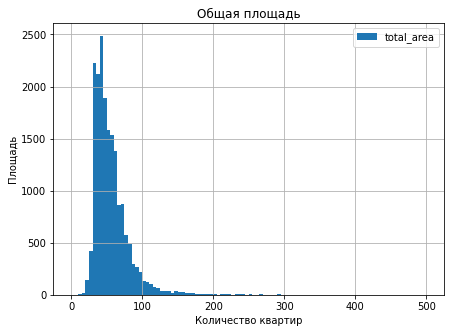

In [55]:
# изучены и описаны следующие параметры: общая площадь  
ax = data_filter.plot(y='total_area', kind='hist', title='Общая площадь', grid=True, bins=100, range = (0,500), figsize = (7,5))
ax.set_ylabel('Площадь')
ax.set_xlabel('Количество квартир')
print(ax)
data_filter['total_area'].describe()

Судя по графику большинство квартир имеют площадь 30-58 кв. метров при средней площади 51.2 или медианной площади 58.9). Распределение данных по графику нормальное (Гаусса). Есть выбросы, но не значительные. Впринципе по рынку если смотреть то без аномалий. Потребность высокая на квартиры есть всегда площадью 30-58. Все что выше уже меньше спрос и ниже 30 (это личное мнение из опыта). 

AxesSubplot(0.125,0.125;0.775x0.755)


count    18244.000000
mean        31.184736
std         15.737131
min          2.000000
25%         18.500000
50%         30.000000
75%         38.000000
max        248.699997
Name: living_area, dtype: float64

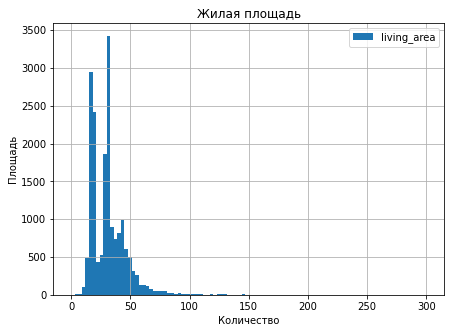

In [56]:
# изучены и описаны следующие параметры: жилая площадь
ax = data_filter.plot(y='living_area', kind='hist', title='Жилая площадь', grid=True, bins=100, range = (0,300), figsize = (7,5))
ax.set_ylabel('Площадь')
ax.set_xlabel('Количество')
print(ax)
data_filter['living_area'].describe()

Больше всего квартир с жилой площадью 30 квадратов. Эта же цифра является средней, медианна равна 33 квадратам. Считаю, что данные верные и находятся в одной логике в общей площадью, где большинство квартир как раз находятся в интервале до 58 квадратов в которые как раз входят 30 квадратов жилое, остальная площадь в нежилое (кухня, санузел и тд. Надо ниже посмотреть что по кухне. 

AxesSubplot(0.125,0.125;0.775x0.755)


count    18244.000000
mean         9.897406
std          4.511592
min          2.000000
25%          7.100000
50%          9.100000
75%         11.000000
max         77.000000
Name: kitchen_area, dtype: float64

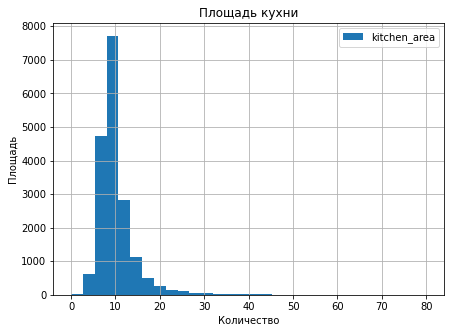

In [57]:
# изучены и описаны следующие параметры: площадь кухни
ax = data_filter.plot(y='kitchen_area', kind='hist', title='Площадь кухни', grid=True, bins=30, range = (0,80), figsize = (7,5))
ax.set_ylabel('Площадь')
ax.set_xlabel('Количество')
print(ax)
data_filter['kitchen_area'].describe()

С площадью кухни тоже ничего не обычного, самый "популярный" размер около 10 кв.метров, что также входят во всю вышеуказанную логику по общей площади и по жилой площади. 

AxesSubplot(0.125,0.125;0.775x0.755)


count        18244.0
mean       5477733.0
std        6332983.5
min         430000.0
25%        3300000.0
50%        4350000.0
75%        6000000.0
max      401300000.0
Name: last_price, dtype: float64

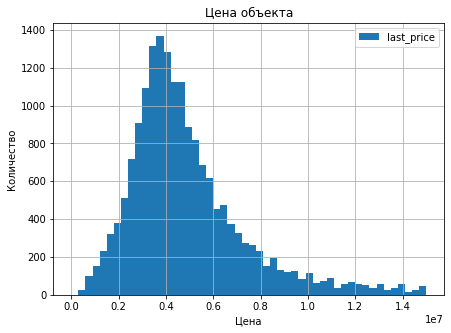

In [58]:
# изучены и описаны следующие параметры: цена объекта

ax = data_filter.plot(y='last_price', kind='hist', title='Цена объекта', grid=True, bins=50, range = (0,15000000), figsize = (7,5))
ax.set_ylabel('Количество')
ax.set_xlabel('Цена')
print(ax)
data_filter['last_price'].describe()

AxesSubplot(0.125,0.125;0.775x0.755)


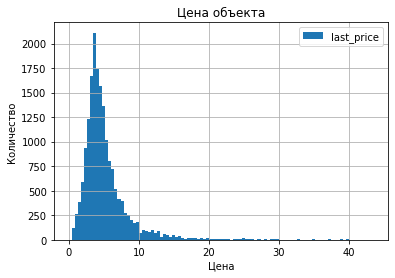

In [59]:
new_df = data_filter.copy()

new_df['last_price'] = new_df['last_price'] / 1000000

ax = new_df.plot(y='last_price', kind='hist', title='Цена объекта', grid=True, bins=100, range=(0, new_df['last_price'].median()*10))
ax.set_ylabel('Количество')
ax.set_xlabel('Цена')
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


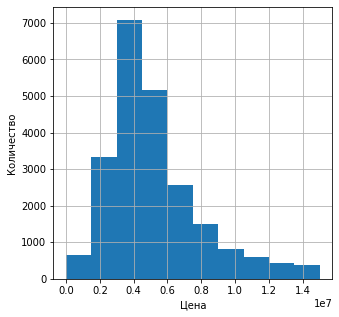

In [60]:
ax = data['last_price'].hist(range = (0, 15000000), figsize=(5, 5))
ax.set_ylabel('Количество')
ax.set_xlabel('Цена')
print(ax)

С ценой оценить сложно. Данные распределяются нормально (Гаусс), но выдаются в значениях метода describe. При просмотре данных с таблицы describe можно сделать вывод, что средняя цена на квартиру равна 6,25 млн. рублей. 

AxesSubplot(0.125,0.125;0.775x0.755)


count    18244.000000
mean         1.940912
std          0.942294
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

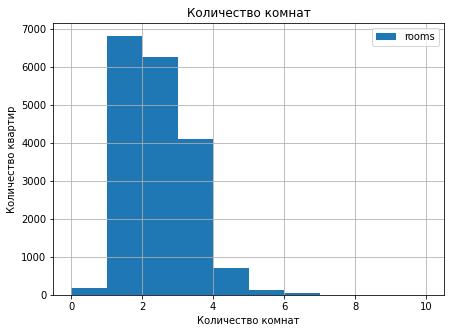

In [61]:
# изучены и описаны следующие параметры: количество комнат
ax = data_filter.plot(y='rooms', kind='hist', title='Количество комнат', grid=True, bins=10, range = (0,10), figsize = (7,5))
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Количество комнат')
print(ax)
data_filter['rooms'].describe()

По количеству комнат данные укладываются в нашу общую логику с площадью. Как правило квартиры с площадью 59 кв.м (самая популярная) имеют 2 или 3 комнаты (тоже самое популярное количество). 

AxesSubplot(0.125,0.125;0.775x0.755)


count    18244.000000
mean         2.703206
std          0.127843
min          2.000000
25%          2.600000
50%          2.771499
75%          2.771499
max          3.000000
Name: ceiling_height, dtype: float64

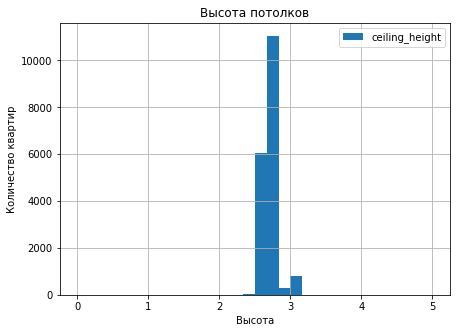

In [62]:
# изучены и описаны следующие параметры: высота потолков
ax = data_filter.plot(y='ceiling_height', kind='hist', title='Высота потолков', grid=True, bins=30, range = (0,5), figsize = (7,5))
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Высота')
print(ax)
data_filter['ceiling_height'].describe()

Можно сделать вывод, что по высоте потолков квартиры стандартны и имеют в основном высоту в 2.7 м. Есть некоторые варианты выше, но они слишком малы.

AxesSubplot(0.125,0.125;0.775x0.755)


count    18244.000000
mean         6.013210
std          4.844079
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         24.000000
Name: floor, dtype: float64

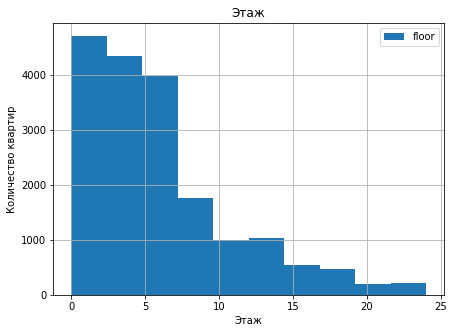

In [63]:
# изучены и описаны следующие параметры: этаж квартиры
ax = data_filter.plot(y='floor', kind='hist', title='Этаж', grid=True, bins=10, range = (0,24), figsize = (7,5))
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Этаж')
print(ax)
data_filter['floor'].describe()

Можно сказать, что квартиры в основном размещены на нижних этажах. Самый популярный 1-2 этаж. Дальше квартиры идут по убыванию судя по графику при возрастании этажа. Можно предположить, что высокие дома (выше 14 этажа) реже встречаются, чем дома ниже. Эту гипотезу мы докажем ниже когда рассмотрим график с количеством этажей в домах. 
Дополнительно хочется отметить, что есть большое число квартир с 0 этажем. Нужно уточнить это у поставщика данных. 

In [64]:
# изучены и описаны следующие параметры: тип этажа квартиры («первый», «последний», «другой»)
data_filter_type_flat_sum = data_filter['type_flat'].value_counts()
type_flat_sum.plot.bar(x=type_flat, y=type_flat_sum)
data_filter['type_flat'].describe()

NameError: name 'type_flat_sum' is not defined

Здесь указывает , что в основном квартиры продаются с 2 этажа и до предпоследнего. Расхождение с 1 этажом по это гистограмме с гистограммой по этажам квартиры возможно изза ситуации с 0 этажом. Здесь нужно разбираться. 

In [ ]:
# изучены и описаны следующие параметры: общее количество этажей в доме
ax = data_filter.plot(y='floors_total', kind='hist', title='Количество этажей', grid=True, bins=10, range = (0,40), figsize = (7,5))
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Всего этажей в доме')
print(ax)
data_filter['floors_total'].describe()

Судя по этому графику я могу точно сделать окончательный вывод, указанный выше. Большинство домов даже ниже 14 этажей, поэтому и квартиры расположенные выше 14 этажа меньше в обьявлениях на продажу. 

In [ ]:
# изучены и описаны следующие параметры: расстояние до центра города в метрах
ax = data_filter.plot(y='cityCenters_nearest', kind='hist', title='До центра города', grid=True, bins=50, range = (0,50000), figsize = (7,5))
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Расстояние')
print(ax)
data_filter['cityCenters_nearest'].describe()

В основном квартиры в продаже размещены в 13 км от центра. Есть и ближе, но основные обьявления именно в этом диапазоне. Думаю можно сказать, что квартиры сконцентрированы в одном районе. 

In [ ]:
# изучены и описаны следующие параметры: расстояние до ближайшего аэропорта
ax = data_filter.plot(y='airports_nearest', kind='hist', title='До аэропорта', grid=True, bins=50, range = (0,70000), figsize = (7,5))
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Расстояние')
print(ax)
data_filter['airports_nearest'].describe()

Исходя из размещения большого количества квартир в одном районе (как гипотеза) логично что и равномерное количество квартир будет размещено в одинаковом расстоянии от аэропорта. Среднее размещение 28 км от аэропорта. Выходит пока , что большинство квартир находятся в 13 км от центра и 28 км от аэропорта. 

In [ ]:
# изучены и описаны следующие параметры: расстояние до ближайшего парка
ax = data_filter.plot(y='parks_nearest', kind='hist', title='До парка', grid=True, bins=30, range = (0,1000), figsize = (7,5))
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Расстояние')
print(ax)
data_filter['parks_nearest'].describe()

То же самое можно сказать и про расстояние до парка. Среднее и медианное значение 449 и 455 м. Большинство квартир очень удобно расположены.

In [ ]:
display(data_filter.head())

In [ ]:
# изучены и описаны следующие параметры: день публикации объявления
days_publication_sum = data_filter['days_publication'].value_counts()


ax = days_publication_sum.plot.bar(x='days_publication', y=days_publication_sum)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('День публикации')
print(ax)
data_filter['days_publication'].describe()

По графику видно, что обьявления о продаже в основном выкладывали в четверг, но разница между днями недели не большая. Реже всего в выходные люди вкладывали свои обьявления. Понятно чем люди занимаются на работе :)

In [ ]:
# изучены и описаны следующие параметры: месяц публикации объявления

month_publication_sum = data_filter['month_publication'].value_counts()

ax = month_publication_sum.plot.bar(x='month_publication', y=month_publication_sum)
ax.set_ylabel('Количество квартир')
ax.set_xlabel('Месяц публикации')
print(ax)
data_filter['month_publication'].describe()

Тут явно выражена тенденция к продаже квартир либо в начале года , либо в конце. Причем равно как первый месяц так и последний месяц года, когда в основном все либо в поготовке к новому году, либо только входят в новый год, обьявлений выложено меньше. 

In [ ]:
# "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, 
#сколько дней «висело» каждое объявление.

data_filter['days_exposition'].hist(bins=50, range=(0, 999))
data_filter['days_exposition'].describe()

In [ ]:
plt.boxplot(data_filter['days_exposition'])
plt.ylim(0,1000)

In [ ]:
data_filter.plot(y='days_exposition', bins=30, kind='hist', grid=True, range=(0,1000), figsize=(12, 5))

Исходя из данных, полученных из графиков средний срок сколько висит обьявление до продажи 144 дня, медианна составляет 71 день. Есть большой перечень квартир реализованные сразу же как было выставлено обьявление. На этот показатель возможно повлиял тот факт, что мы заполнили пропуски "0" в предобработке. Поэтому результат "скоростной" продажи выше реального. Но если мы даже уберем показатель "0", все равно большое число квартир продается в 1 день размещения. Можно сказать, что квартиры реализуются быстро на сервисе Яндекс.Недвижимость. Есть квартиры которые висят 999 дней, но считаю скорее что это аномалия. Судя по "ящику с усами" есть большое количество "выбросов" за 500 дней. Возможно стоить уточнить у поставика данных об этих квартирах. 

In [ ]:
#"Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость 
# цены от указанных ниже параметров. 
# Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

In [ ]:
pivot_table_total_area = (
    data_filter.pivot_table(index='total_area', values='last_price', aggfunc = ['median','count'])
    .plot(y='median', title='Взаимосвязь цены с площадью', style='o', figsize=(8, 8), grid=True)
)

print('Корреляция равна', data_filter['total_area'].corr(data_filter['last_price']))

In [ ]:
pivot_table_total_area = (
    data_filter.pivot_table(index='living_area', values='last_price', aggfunc = ['median','count'])
    .plot(y='median', title='Взаимосвязь цены с жилой площадью', style='o', figsize=(8, 8), grid=True)
)
print('Корреляция равна', data_filter['living_area'].corr(data_filter['last_price']))

In [ ]:
pivot_table_total_area = (
    data_filter.pivot_table(index='kitchen_area', values='last_price', aggfunc = ['median','count'])
    .plot(y='median', title='Взаимосвязь цены с площадью кухни', style='o', figsize=(8, 8), grid=True)
)
print('Корреляция равна', data_filter['kitchen_area'].corr(data_filter['last_price']))

In [ ]:
pivot_table_total_area = (
    data_filter.pivot_table(index='rooms', values='last_price', aggfunc = ['median','count'])
    .plot(y='median', title='Взаимосвязь цены с количеством комнат', figsize=(8, 8), grid=True)
)
print('Корреляция равна', data_filter['rooms'].corr(data_filter['last_price']))

In [ ]:
from matplotlib.ticker import FormatStrFormatter

ax = data_filter.groupby('type_flat')['last_price'].median().plot.bar(
    title='Зависимость между типом и ценой', rot=45, figsize=(7,7))
ax.set(xlabel='Тип этажа объекта', ylabel='Количество объектов')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


In [ ]:
pivot_table_total_area = (
    data_filter.pivot_table(index='days_publication', values='last_price', aggfunc = ['median','count'])
    .plot(y='median', title='Взаимосвязь цены с днем публикации', figsize=(8, 8), grid=True)
)
print('Корреляция равна', data_filter['days_publication'].corr(data_filter['last_price']))

In [ ]:
pivot_table_total_area = (
    data_filter.pivot_table(index='month_publication', values='last_price', aggfunc = ['median','count'])
    .plot(y='median', title='Взаимосвязь цены с месяцем публикации', figsize=(8, 8), grid=True)
)
print('Корреляция равна', data_filter['month_publication'].corr(data_filter['last_price']))

In [ ]:
pivot_table_total_area = (
    data_filter.pivot_table(index='year_publication', values='last_price', aggfunc = ['median','count'])
    .plot(y='median', title='Взаимосвязь цены с годом публикации', figsize=(8, 8), grid=True)
)
print('Корреляция равна', data_filter['year_publication'].corr(data_filter['last_price']))

In [ ]:
g = sns.pairplot(data_filter,
            x_vars=['total_area', 'living_area', 'kitchen_area', 'rooms', 'type_flat', 'days_publication', 'month_publication', 'year_publication'],
            y_vars=['last_price'],
            )
g.fig.set_figheight (6)
g.fig.set_figwidth (30)

Проведя небольшое исследование видно, что есть определенная зависимость цены от общей площади квартиры, чуть меньше от жилой площади и от площади кухни. Это подтверждает и коэффициент корреляции Пирсона. Впринципе это логично, что при увеличении площади цена должна расти и наоборот, тут играет и роль стоимость квадратного метра. Логично , что чем больше площадь больше и квадратных метров.С количеством комнат тоже присутствует взаимосвязь, но ниже чем с площадью. 
А вот в части зависимости цены с типом квартиры я не прослеживаю корреляцию. Мое мнение и график и коэффициент корреляции Пирсона явно показывает отсутствие зависимости. 
По вопросу времени даты публикации (день, месяц, год) суя по графику можно сказать, что было достаточно резкое падение цены в 2014-2015 годах и далее уход в "штиль", когда цена по сути не менялась до 2018 года. После замечен небольшой рост. 
В части дней и месяцев я вижу, что в будни цены выше, чем в выходные. Ранее выше по исследованию, мы пришли к выводу, что чаще всего выкладывают обьявления именно в будни. Можно выдвинуть мысль, что рост цен в будни зависит от повышения активности. Больше людей выкладывают объявления и собственно устанавливают цену. По месяцам есть сильное падение цены в июне, и снижения в начале года. Но я бы не стал устанавливать какую либо зависимость цены от времени публикации. 

In [ ]:
data_filter[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

In [ ]:
# выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
# Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце 
# locality_name."

In [ ]:
data_top = data_filter.pivot_table(index = 'locality_name', values = 'price_per_metr', aggfunc=['count', 'mean'])
data_top.columns = ['count', 'mean']
data_top_sort = data_top.sort_values('count', ascending = False).head(10)
display(data_top_sort[data_top_sort['mean']==data_top_sort['mean'].max()])
display(data_top_sort[data_top_sort['mean']==data_top_sort['mean'].min()])
print('Топ-10 населенных пунктов')
display(data_top_sort)

Самым дорогим городом оказался Санкт-Петербург. Что не удивительно. Из топ-10 населённых пунктов с наибольшим числом объявлений самый дешевый сал - Выборг. 

In [ ]:
#выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге 
#с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит 
#от расстояния до центра города."

In [ ]:
data_filter_spb = (
    data_filter
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index= 'km_cityCenters_nearest', values='price_per_metr', aggfunc=('mean'))
)
display(data_filter_spb)
data_filter_spb.plot(y='price_per_metr', title='Средняя цена каждого километра', figsize=(8, 8), grid=True)

Исходя из полученных данных, а также графика можно сделать вывод, что чем дальше объекты размещены от центра города, тем они дешевле. Размещение всегда играло большую роль в цене. Здесь нет ничего не обычного. 

### Общий вывод

##### Мы изучили большой массив данных. На первоначальном этапе провели сначала подготовительную работу и привели таблицу в читаемый вид. После этого перешли к фазе предобработки данных. Заменили пропуски в ряде столбцов используя метод медианы и среднего. Часть пропусков интуитовно были заполнены "0" (было принято решение, что например балкон отсутствует и поэтому по нему нет данных в обьявлении). Были изменены типы данных для последующей работы. Также проработаны неявные дубликаты. Наименование населенных пунктов было приведено в единый формат для удобства работы с ними.  После этого проведена уже более глубокая работа, осуществлен поиск аномалий. Постоены гистограммы и фигуры "ящик с усами". На основании этих графиков были обнаружены "выбросы", которые были удалены. После добавление новых столбцов в таблицу мы приступили к исследовательскому анализу данных. 
##### При исследовании была определена самая популярная площадь (58 кв.м) среди квартир, выставленных в обьявлениях. Эти квартиры имеют в основном 2 или 3 комнаты (большинство квартир выложенных в объявлениях). Также была определена средняя цена на квартиру равная 6,25 млн. рублей. В части размещения в основном на продажу выставлены квартиры которые находятся на 1-2 этаже. Мы предположить, что высокие дома (выше 14 этажа) реже встречаются, чем дома ниже. Эту гипотезу мы доказали когда рассмотрели график с количеством этажей в домах. Большинство домов даже ниже 14 этажей, поэтому и квартиры расположенные выше 14 этажа меньше в обьявлениях на продажу. Посмотрев обьявления по расположению домов от центра города , от папрков и аэропорта можно предположить, что большинство выставленных квартир на продажу размещены в одном районе. Есть большое скопление квартир в одной части и дальше резкое распределение. По графику построенному в части публикации объявлений по дням видно, что обьявления о продаже в основном выкладывали в четверг, но разница между днями недели не большая. Реже всего в выходные люди вкладывали свои обьявления. Если рассматривать по месяцам, то можно увидеть, что в начале года и в конце был всегда спад, и ближе к середине количество объявлений увеличивались. Исходя из данных, полученных из графиков средний срок сколько висит обьявление до продажи 144 дня, медианна составляет 71 день. Есть большой перечень квартир реализованные сразу же как было выставлено обьявление. На этот показатель возможно повлиял тот факт, что мы заполнили пропуски "0" в предобработке. Поэтому результат "скоростной" продажи выше реального. Но если мы даже уберем показатель "0", все равно большое число квартир продается в 1 день размещения. Можно сказать, что квартиры реализуются быстро на сервисе Яндекс.Недвижимость.
##### Можно сказать, что есть определенная зависимость цены от общей площади квартиры, чуть меньше от жилой площади и от площади кухни. Это подтверждает и коэффициент корреляции Пирсона. Также чем больше площадь больше и квадратных метров.С количеством комнат тоже присутствует взаимосвязь, но ниже чем с площадью. А вот в части зависимости цены с типом квартиры я не прослеживаю корреляцию. Мое мнение и график и коэффициент корреляции Пирсона явно показывает отсутствие зависимости. По вопросу времени даты публикации (день, месяц, год) суя по графику можно сказать, что было достаточно резкое падение цены в 2014-2015 годах и далее уход в "штиль", когда цена по сути не менялась до 2018 года. После замечен небольшой рост. В части дней и месяцев я вижу, что в будни цены выше, чем в выходные. Ранее выше по исследованию, мы пришли к выводу, что чаще всего выкладывают обьявления именно в будни. Можно выдвинуть мысль, что рост цен в будни зависит от повышения активности. Больше людей выкладывают объявления и собственно устанавливают цену. По месяцам есть сильное падение цены в июне, и снижения в начале года. Но я бы не стал устанавливать какую либо зависимость цены от времени публикации
##### Были также обнаружены небольшие аномалии требующие уточнения у поставщика данных. Например есть квартиры которые висят 999 дней, но считаю скорее что это аномалия. Судя по "ящику с усами" есть большое количество "выбросов" за 500 дней. Также есть большое число квартир с 0 этажем. 
##### Самым дорогим городом оказался Санкт-Петербург. Из топ-10 населённых пунктов с наибольшим числом объявлений самый дешевый сnал - Выборг. Взаимосвязь также установлена между ценой и удаленности от центра города. Чем дальше квартира от центра тем она дешевле. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод